In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
%matplotlib inline

In [2]:
# data contains all data merged together
data = pd.read_csv('allstudents.csv')

In [3]:
data.head()

,student #,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,1,GP,F,15,R,GT3,T,1,1,at_home,...,3,1,2,1,1,1,4,13,13,13
1,2,GP,F,15,R,GT3,T,1,1,other,...,3,3,4,2,4,5,2,13,11,11
2,3,GP,F,15,R,GT3,T,2,2,at_home,...,4,3,1,1,1,2,8,14,13,12
3,4,GP,F,15,R,GT3,T,2,4,services,...,4,3,2,1,1,5,2,10,11,10
4,5,GP,F,15,R,GT3,T,3,3,services,...,4,2,1,2,3,3,2,13,13,13


There are 383 students in our dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 54 columns):
student #       382 non-null int64
school          382 non-null object
sex             382 non-null object
age             382 non-null int64
address         382 non-null object
famsize         382 non-null object
Pstatus         382 non-null object
Medu            382 non-null int64
Fedu            382 non-null int64
Mjob            382 non-null object
Fjob            382 non-null object
reason          382 non-null object
nursery         382 non-null object
internet        382 non-null object
guardian.x      382 non-null object
traveltime.x    382 non-null int64
studytime.x     382 non-null int64
failures.x      382 non-null int64
schoolsup.x     382 non-null object
famsup.x        382 non-null object
paid.x          382 non-null object
activities.x    382 non-null object
higher.x        382 non-null object
romantic.x      382 non-null object
famrel.x        382 non-null int64
fre

# BASIC VISUALIZATIONS

## GENDER

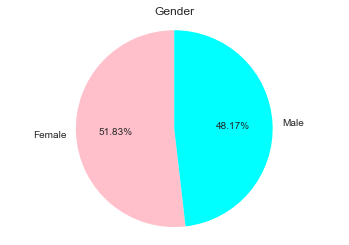

In [19]:
f, ax = plt.subplots()
a = plt.pie(data['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors = ['pink', 'cyan'],
        autopct='%1.2f%%', startangle=90)
axis = plt.axis('equal')
plt.title('Gender')
plt.savefig('gender.png', bbox_inches='tight')

## AGE

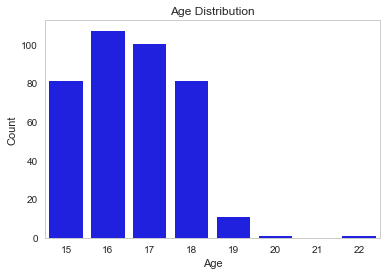

In [20]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'age', data=data, order=list(range(15, 23)), color = 'blue')
ax = ax.set(ylabel="Count", xlabel="Age")
figure.grid(False)
plt.title('Age Distribution')
plt.savefig('age.png', bbox_inches='tight')

## WEEKLY STUDY TIME

In [10]:
studytimes_combined = pd.concat([data['studytime.x'], data['studytime.y']])

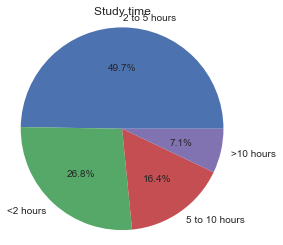

In [21]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(studytimes_combined.value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')
plt.title('Study time')
plt.savefig('studytime.png', bbox_inches='tight')

## ROMANTIC RELATIONSHIP

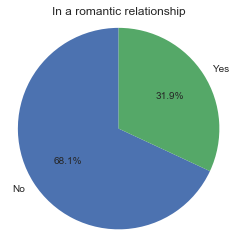

In [22]:
f, ax = plt.subplots(figsize=(4, 4))
romantic_combined = pd.concat([data['romantic.x'], data['romantic.y']])
plt.pie(romantic_combined.value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')
plt.title('In a romantic relationship')
plt.savefig('romantic.png', bbox_inches='tight')

## ALCOHOL CONSUMPTION

### Workday alcohol consumption

In [14]:
dalc_combined = pd.concat([data['Dalc.x'], data['Dalc.y']])
dalc_combined = dalc_combined.reset_index()
dalc_combined.rename(columns={0:'count'}, inplace=True)
dalc_combined.columns = ['ID','Workday alcohol']

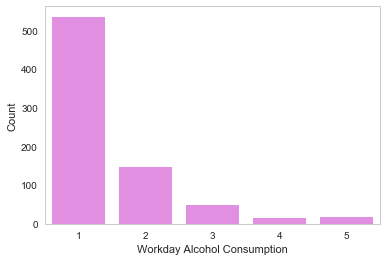

In [15]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Workday alcohol', data=dalc_combined, order=list(range(1, 6)), color = 'violet')
ax = ax.set(ylabel="Count", xlabel="Workday Alcohol Consumption")
figure.grid(False)
plt.savefig('alcohol_workday.png', bbox_inches='tight')

### Weekend alcohol consumption

In [17]:
walc_combined = pd.concat([data['Walc.x'], data['Walc.y']])
walc_combined = walc_combined.reset_index()
walc_combined.rename(columns={0:'count'}, inplace=True)
walc_combined.columns = ['ID','Weekend alcohol']

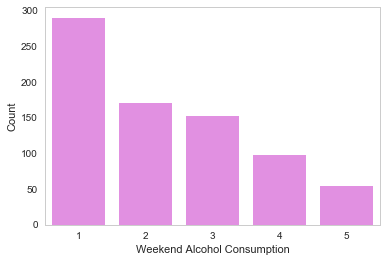

In [23]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Weekend alcohol', data=walc_combined, order=list(range(1, 6)), color = 'violet')
ax = ax.set(ylabel="Count", xlabel="Weekend Alcohol Consumption")
figure.grid(False)
plt.savefig('alcohol_weekend.png', bbox_inches='tight')